## Bank Nifty Prediction Model using KNN CLassifier Machine Learning 

In [424]:
# Importing libraries 
import pandas as pd
import yfinance as yf 
import numpy as np
import pandas_ta as ta

# Downloading Data using yfinance 
start='2020-01-01'
end='2023-01-01'
df = yf.download(tickers="^NSEBANK",
                 period="max",
                )
                #  start=start,   # <- Uncomment and add dates for speciifed period
                #  end=end)

#Adding Dailly percentage returns into the analysis
df['daily_returns']=df['Adj Close'].pct_change()

print("Number of data points are" , len(df))

[*********************100%***********************]  1 of 1 completed
Number of data points are 3608


<Axes: title={'center': 'Closing Prices '}, xlabel='Dates', ylabel='Price'>

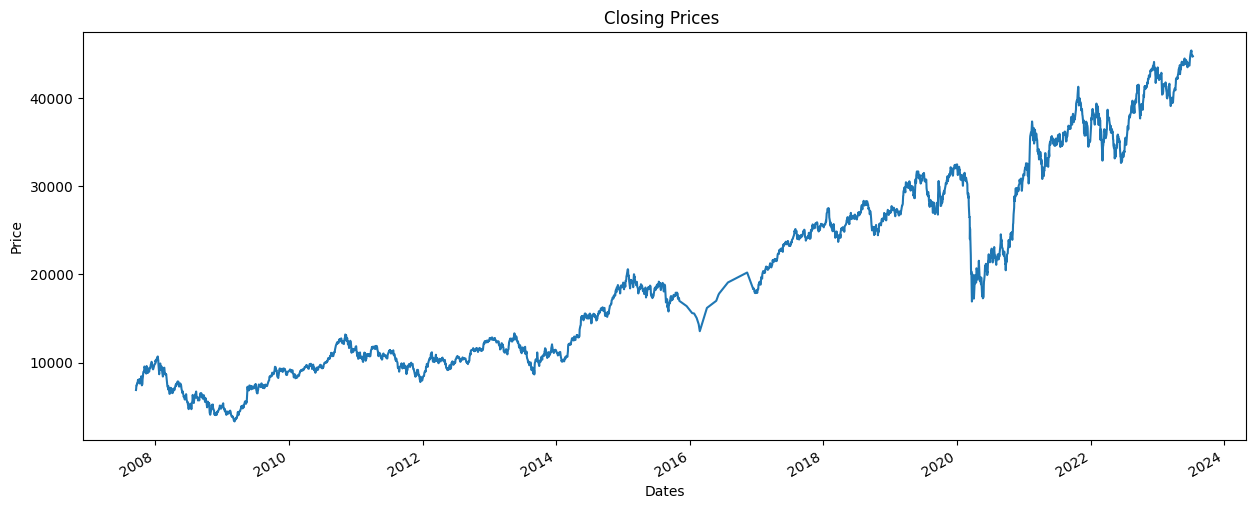

In [425]:
df['Close'].plot(
    figsize=[15,6],
    title="Closing Prices ",
    xlabel="Dates",
    ylabel="Price")


In [426]:
# Data Preprocessing 
counter=0
# Check if any variable is zero or NaN
for col in df.columns:
    zero_index = df[ df[col] == 0 ].index
    df.drop(zero_index , inplace=True)
df.dropna(inplace=True)
print("Number of NaNs Left  = ",int(df.isna().sum().sum()))
for col in df.columns:
    zero_index = df[ df[col] == 0 ].index
    counter+=len(zero_index)
print("Number of zeros left = ",counter)


Number of NaNs Left  =  0
Number of zeros left =  0


In [427]:
df

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2013-08-20,8939.200195,9277.049805,8860.150391,9218.950195,9218.842773,60800,0.008086
2013-08-21,9652.000000,9766.099609,9129.250000,9264.400391,9264.292969,88400,0.004930
2013-08-22,9194.849609,9373.799805,9005.250000,9268.900391,9268.792969,73300,0.000486
2013-08-23,9322.799805,9493.849609,9215.849609,9470.099609,9469.989258,53500,0.021707
2013-08-26,9529.700195,9586.650391,9294.049805,9373.549805,9373.440430,39800,-0.010195
...,...,...,...,...,...,...,...
2023-07-07,45118.050781,45227.250000,44844.800781,44925.000000,44925.000000,220900,-0.009151
2023-07-10,44958.648438,45184.300781,44721.898438,44860.851562,44860.851562,220900,-0.001428
2023-07-11,44998.000000,45139.550781,44663.050781,44745.050781,44745.050781,209000,-0.002581


In [428]:
#Building Techical Indicaotrs Using Pandas TA Library in a DataFrame Structure 

period = {
        "ATR_period"        : 20,
        "RSI_period"        : 14,
        "Average"           : 1 ,
        "Moving_Average"    : [9,26,150] 
        }

df['ATR'] = df.ta.atr(length=20)
df['RSI'] = df.ta.rsi()
df['Average'] = df.ta.midprice(length=1) #midprice
df['MA9'] = df.ta.sma(length=9)
df['MA26'] = df.ta.sma(length=26)
df['MA150'] = df.ta.sma(length=50)

from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df['slopeMA9'] = df['MA9'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA26'] = df['MA26'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA150'] = df['MA150'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [405]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_returns,ATR,RSI,Average,MA9,MA26,MA150,slopeMA9,slopeMA26,slopeMA150,AverageSlope,RSISlope
Date,,,,,,,,,,,,,,,,,,
2023-07-07,19422.800781,19523.599609,19303.599609,19331.800781,19331.800781,237100,-0.008488,143.145227,68.309004,19413.599609,19178.766927,18853.898137,18578.732070,68.027548,33.206003,33.669377,56.409263,-0.236946
2023-07-10,19400.349609,19435.849609,19327.099609,19355.900391,19355.900391,268200,0.001247,141.425465,68.926411,19381.474609,19252.622613,18887.288537,18607.549062,71.057385,32.239631,32.553061,18.862751,-1.460909
2023-07-11,19427.099609,19515.099609,19406.449219,19439.400391,19439.400391,251300,0.004314,142.314153,71.032189,19460.774414,19321.733724,18922.107797,18635.037070,72.828491,32.478207,30.950008,12.632031,-1.644445
2023-07-12,19497.449219,19507.699219,19361.750000,19384.300781,19384.300781,327900,-0.002834,142.495906,67.768593,19434.724609,19367.533854,18952.509766,18659.770078,69.777703,32.642280,29.103980,8.372126,-1.819288
2023-07-13,19495.199219,19567.000000,19385.800781,19413.750000,19413.750000,310400,0.001519,144.506072,68.599007,19476.400391,19392.500434,18983.846304,18686.248086,59.264187,32.392606,27.428635,8.905106,-1.360524


# Target categories

In [430]:
#Parameters
y_delta = 1000 # for TP
STRatio = 2  # y_delta/Ratio gives SL

def classfier(look_ahead_window, dataframe):
    high = dataframe['High'].tolist()
    low = dataframe['Low'].tolist()
    open = dataframe['Open'].tolist()
    length = len(open)
    category = [None] * length
    
    for line in range(length - look_ahead_window - 2):
        valueOpenLow = 0
        valueOpenHigh = 0
        
        for i in range(1, look_ahead_window + 2):
            value1 = open[line + 1] - low[line + i]
            value2 = open[line + 1] - high[line + i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if valueOpenLow >= y_delta and -valueOpenHigh <= (y_delta / STRatio):
                category[line] = 1  # downtrend
                break
            elif valueOpenLow <= (y_delta / STRatio) and -valueOpenHigh >= y_delta:
                category[line] = 2  # uptrend
                break
            else:
                category[line] = 0  # no clear trend
                
    return category

# classfier(barsfront to take into account, dataframe)
df['classfier'] = classfier(16, df)
df.dropna(inplace=True)

df['classfier'].value_counts()
            

2.0    344
0.0    307
1.0    268
Name: classfier, dtype: int64

#### Prediction capacity of Indicators - Depends upon Strategy

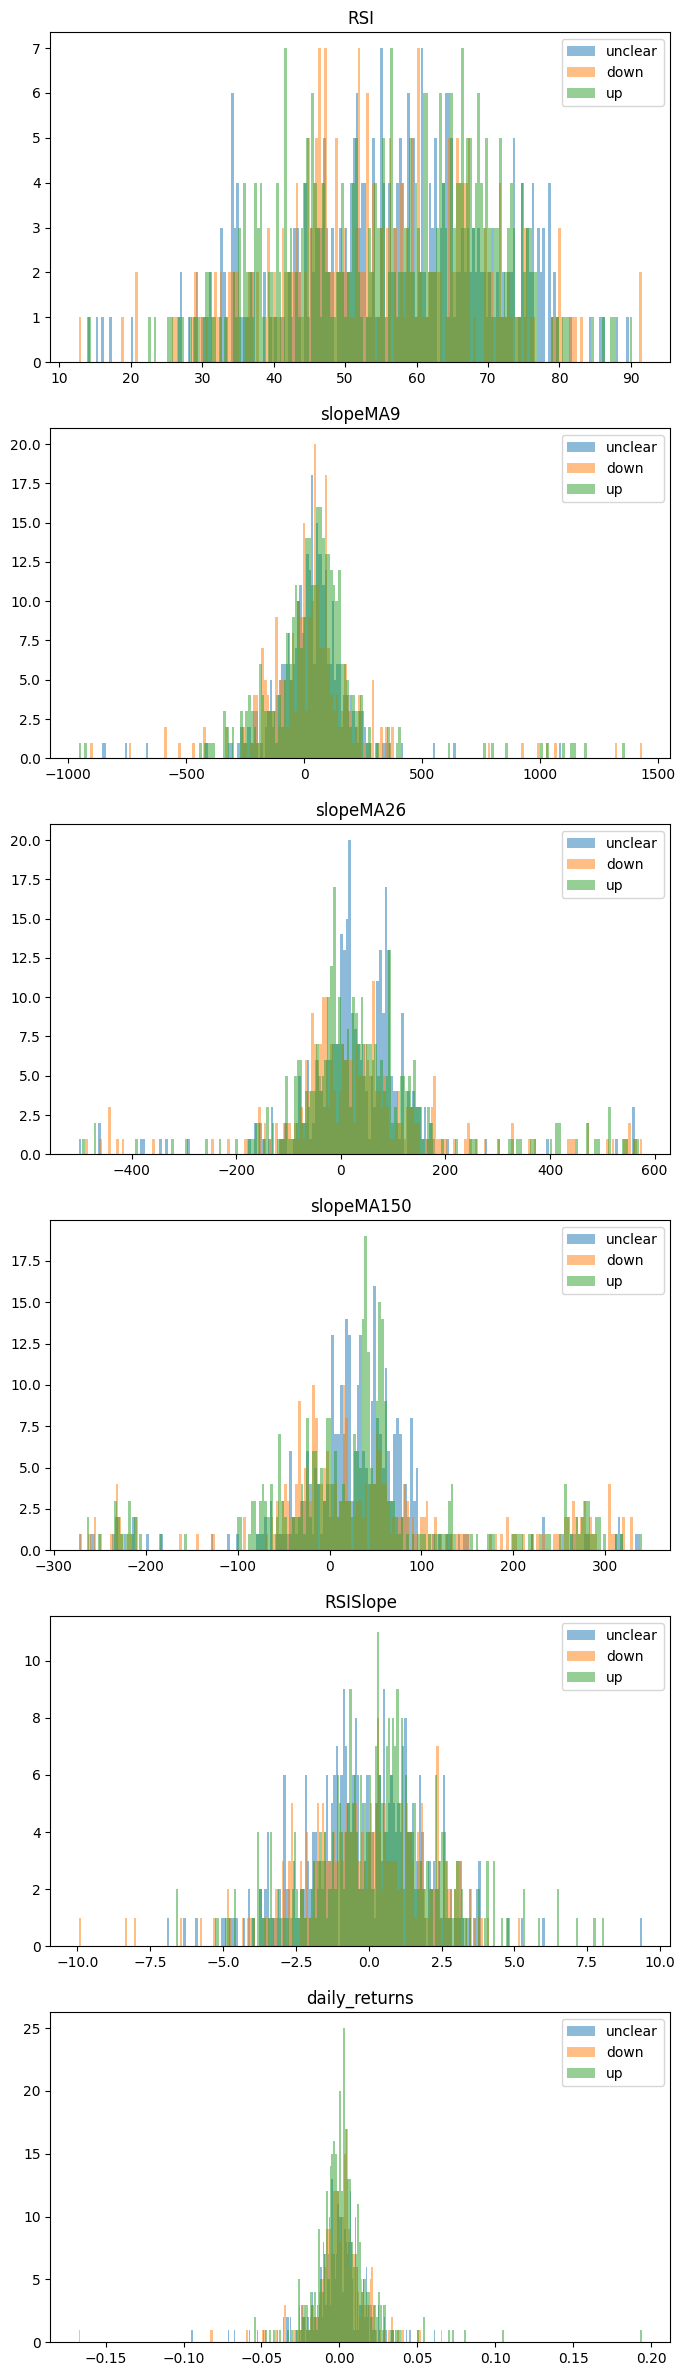

In [518]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(8,30), 'figure.dpi':100})
fig, axes = plt.subplots(6, 1) 
indicators = ['RSI', 'slopeMA9', 'slopeMA26', 'slopeMA150', 'RSISlope','daily_returns']
i=0
for indicator in indicators:
    df_up=df[indicator][ df['classfier'] == 2 ]
    df_down=df[indicator][ df['classfier'] == 1 ]
    df_unclear=df[indicator][ df['classfier'] == 0 ]
    
    axes[i].hist(df_unclear, bins=200, alpha=0.5, label='unclear')
    axes[i].hist(df_down, bins=200, alpha=0.5, label='down')
    axes[i].hist(df_up, bins=200, alpha=0.5, label='up')
    axes[i].set_title(indicator)

    axes[i].legend(loc='upper right')
    i+=1

plt.show()


### Machine learning for trend prediction

##### Splitting features and target

In [502]:
df_model=df.dropna()
attributes=['Volume', 'ATR', 'RSI', 'Average', 'MA9', 'MA26', 'MA150', 'slopeMA9', 'slopeMA26', 'slopeMA150', 'AverageSlope', 'RSISlope','daily_returns' ]
X = df_model[attributes][:-1]
y = df_model["classfier"].shift(-1)[:-1]
print(X.shape)
print(y.shape)


(918, 13)
(918,)


In [503]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Fitting the KNN model

In [504]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=200, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#### Quick evaluation of our fitting

In [505]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['classfier'].value_counts()*100/df_model['mytarget'].count())

# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

Accuracy train: 43.05%
Accuracy test: 37.50%
2.0    37.431991
0.0    33.405876
1.0    29.162133
Name: mytarget, dtype: float64
Accuracy Gambler: 34.24%


#### More powerful model XGBoost

In [506]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 67.3913%


#### Keeping the temporal Structure of Time Series Entact

In [507]:
#random sampling
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#sequential sampling
train_index = int(0.6 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 27.7174%


#### Which features are most important for our model?

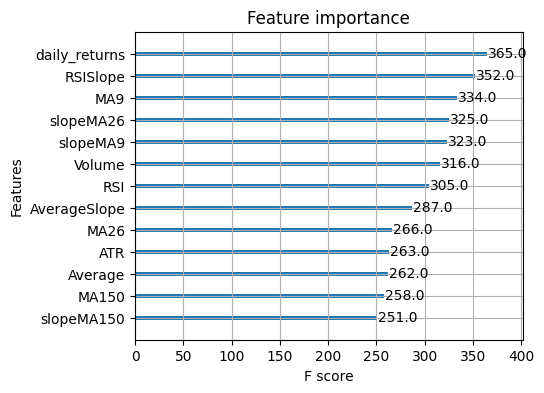

In [508]:
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':100})

from matplotlib import pyplot
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()

In [510]:
portfolio={
    'Pred':pred_test,
    'Ret' :df['daily_returns'][train_index:-1],
    'Date' : df['daily_returns'][train_index:-1]
}
print(pred_test.shape)
print(df['daily_returns'][train_index:-1].shape)
print(df['daily_returns'][train_index:-1].shape)

(368,)
(368,)
(368,)


In [511]:
df_predictions=pd.DataFrame.from_dict(portfolio)

In [512]:
df_predictions["Pred"].value_counts()

1    229
2    115
0     24
Name: Pred, dtype: int64

In [513]:
df_predictions

,Pred,Ret,Date
Date,,,
2021-11-23,0,0.003878,0.003878
2021-11-24,2,0.004538,0.004538
2021-11-25,2,-0.002062,-0.002062
2021-11-26,0,-0.035843,-0.035843
2021-11-29,2,-0.001362,-0.001362
...,...,...,...
2023-05-16,1,-0.003821,-0.003821
2023-05-17,1,-0.004669,-0.004669
2023-05-18,1,0.001227,0.001227


Strat Return Long Only = 59.79008647261763 %
Strat Return = 100.52973484828117 %
Buy and Hold Return = 17.297035091877746 %


C:\Users\paras\AppData\Local\Temp\ipykernel_12196\2177362944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions['Positions'].loc[df_predictions['Pred'] ==1] = 1
C:\Users\paras\AppData\Local\Temp\ipykernel_12196\2177362944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions['Positions'].loc[df_predictions['Pred'] ==2] = -1


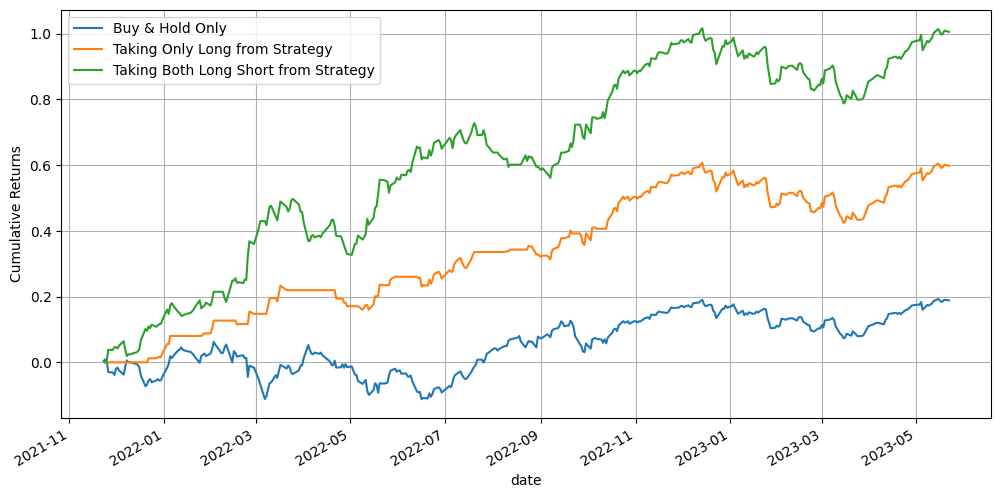

In [515]:
df_predictions['Date'] =df_predictions.index
df_predictions['Positions'] = 0
df_predictions['Positions'].loc[df_predictions['Pred'] ==1] = 1
df_predictions['Positions'].loc[df_predictions['Pred'] ==2] = -1

df_predictions['Strat_ret'] = df_predictions['Positions'].shift(1) * df_predictions['Ret']
df_predictions['Positions_L'] = df_predictions['Positions'].shift(1)
df_predictions.loc[df_predictions['Positions_L'] == -1, 'Positions_L'] = 0
df_predictions['Strat_ret_L'] = df_predictions['Positions_L'] * df_predictions['Ret']

df_predictions['CumRet'] = (1 + df_predictions['Strat_ret']).cumprod() - 1
df_predictions['CumRet_L'] = (1 + df_predictions['Strat_ret_L']).cumprod() - 1
df_predictions['bhRet'] = df_predictions['Ret'].cumsum()

Final_Return_L = np.prod(1 + df_predictions["Strat_ret_L"]) - 1
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["Ret"]) - 1

print("Strat Return Long Only =", Final_Return_L * 100, "%")
print("Strat Return =", Final_Return * 100, "%")
print("Buy and Hold Return =", Buy_Return * 100, "%")

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
df_predictions.plot(x="Date", y="bhRet", label="Buy & Hold Only ", ax=ax)
df_predictions.plot(x="Date", y="CumRet_L", label="Taking Only Long from Strategy", ax=ax)
df_predictions.plot(x="Date", y="CumRet", label="Taking Both Long Short from Strategy", ax=ax)
plt.xlabel("date")
plt.ylabel("Cumulative Returns")
plt.grid()
plt.show()


In [501]:
df_predictions

,Pred,Ret,Date,Positions,Strat_ret,Positions_L,Strat_ret_L,CumRet,CumRet_L,bhRet
Date,,,,,,,,,,
2021-11-22,1,-0.022315,2021-11-22,1,NaN,NaN,NaN,NaN,NaN,-0.022315
2021-11-23,0,0.003878,2021-11-23,0,0.003878,1.0,0.003878,0.003878,0.003878,-0.018437
2021-11-24,1,0.004538,2021-11-24,1,0.000000,0.0,0.000000,0.003878,0.003878,-0.013899
2021-11-25,1,-0.002062,2021-11-25,1,-0.002062,1.0,-0.002062,0.001808,0.001808,-0.015961
2021-11-26,1,-0.035843,2021-11-26,1,-0.035843,1.0,-0.035843,-0.034099,-0.034099,-0.051803
...,...,...,...,...,...,...,...,...,...,...
2023-05-11,1,0.003329,2023-05-11,1,0.003329,1.0,0.003329,0.032381,0.107364,0.156635
2023-05-12,1,0.007320,2023-05-12,1,0.007320,1.0,0.007320,0.039939,0.115471,0.163955
2023-05-15,1,0.006361,2023-05-15,1,0.006361,1.0,0.006361,0.046553,0.122566,0.170316


[*********************100%***********************]  1 of 1 completed
Number of data points are 3608
Number of NaNs Left  =  0
Number of zeros left =  0


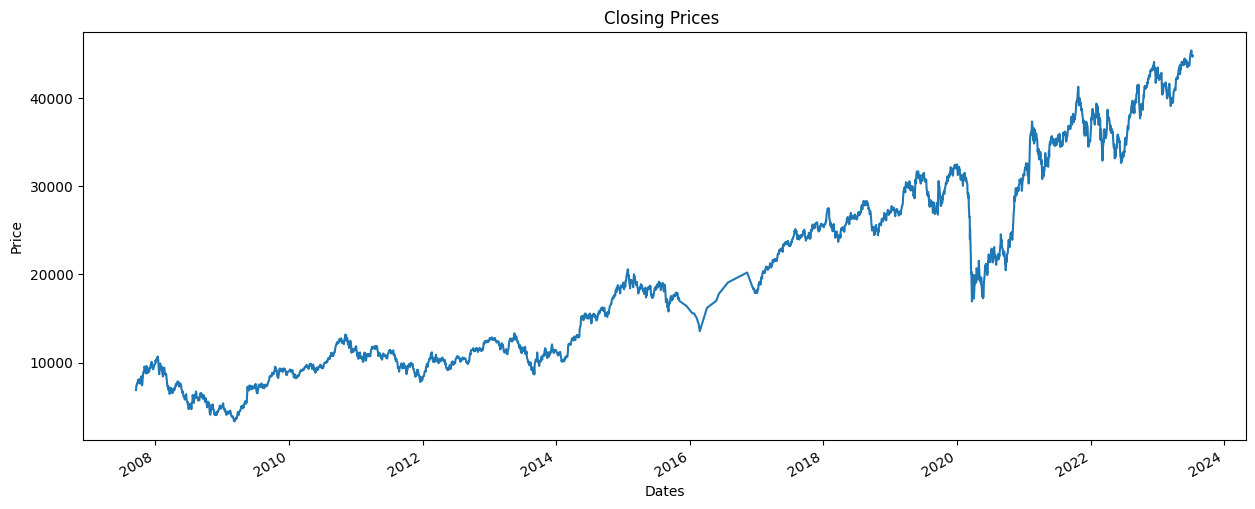

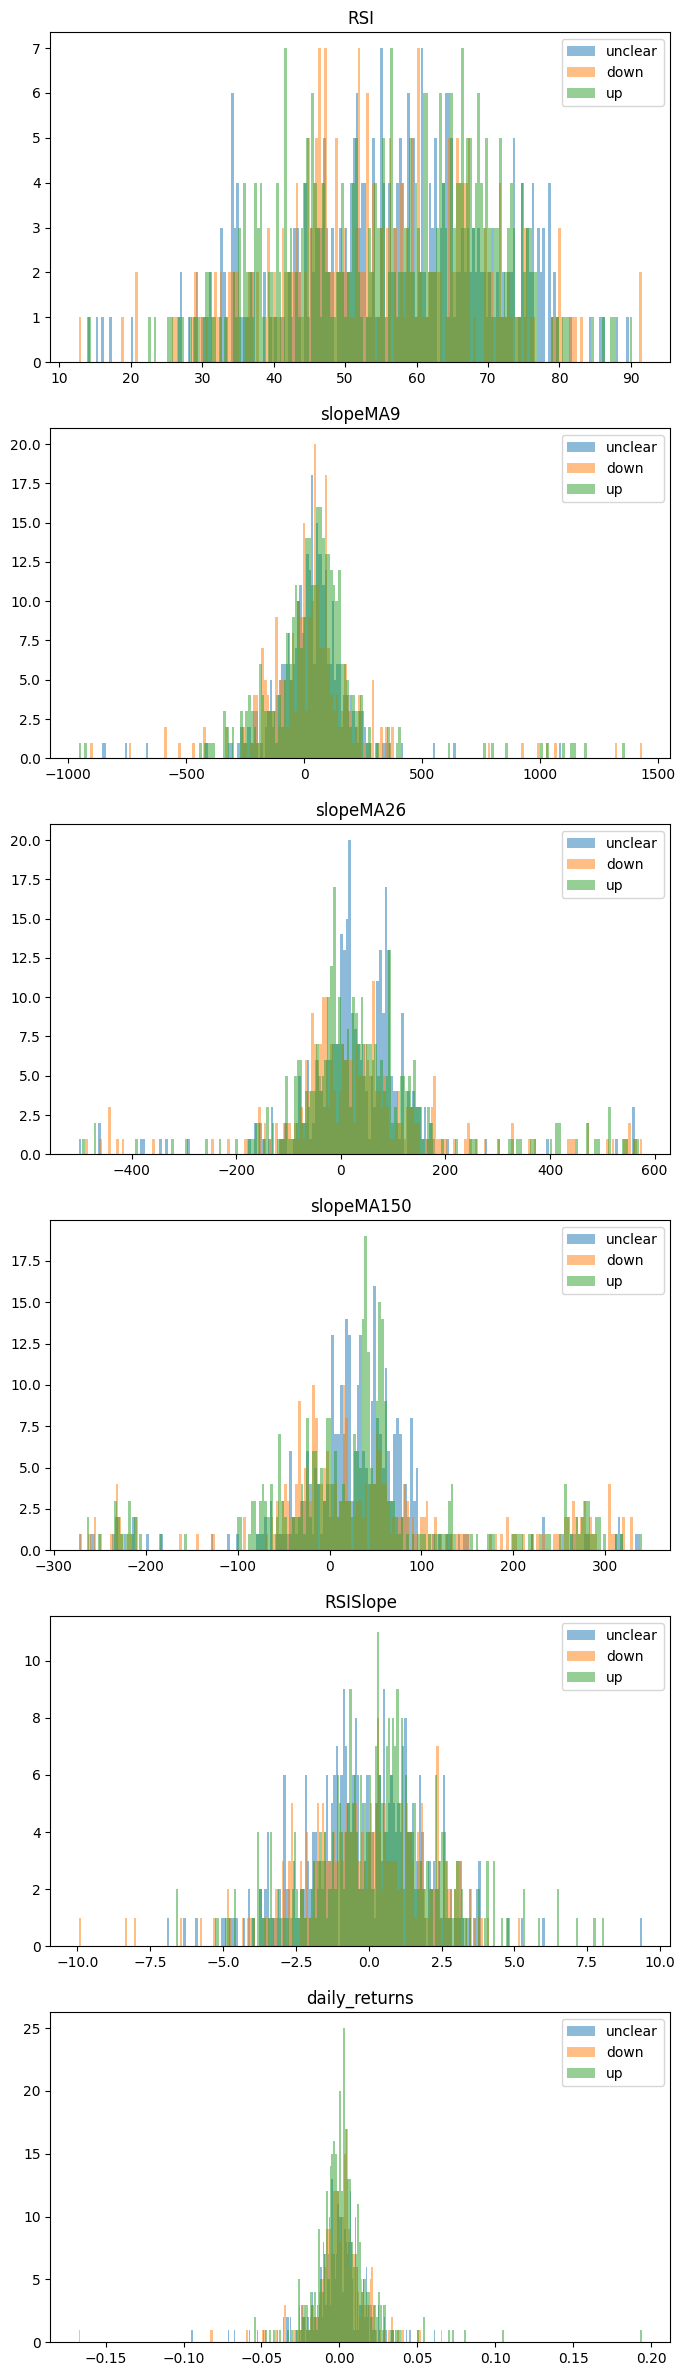

(936, 13)
(936,)
Accuracy train: 42.25%
Accuracy test: 39.89%
2.0    36.819637
0.0    34.578442
1.0    28.601921
Name: classfier, dtype: float64
Accuracy Gambler: 33.51%
****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 69.6809%
****Train Results****
Accuracy: 100.0000%
****Test Results****
Accuracy: 26.6667%


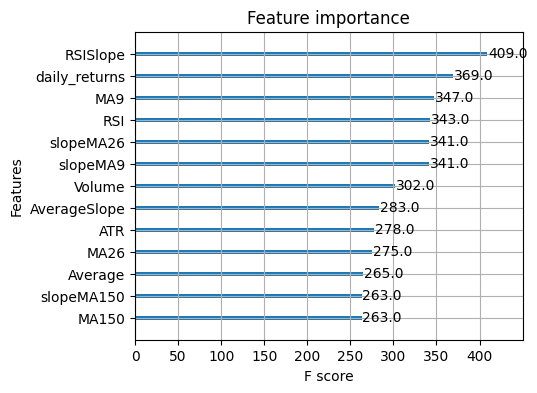

(375,)
(375,)
(375,)
Strat Return Long Only = 59.79008647261763 %
Strat Return = 100.52973484828117 %
Buy and Hold Return = 17.297035091877746 %


C:\Users\paras\AppData\Local\Temp\ipykernel_12196\2173149572.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions['Positions'].loc[df_predictions['Pred'] ==1] = 1
C:\Users\paras\AppData\Local\Temp\ipykernel_12196\2173149572.py:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictions['Positions'].loc[df_predictions['Pred'] ==2] = -1


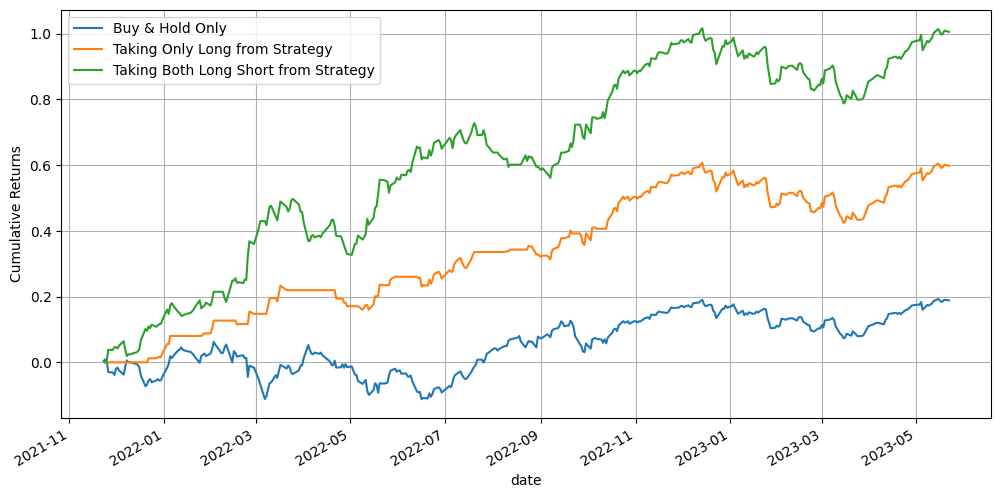

In [522]:
# Importing libraries 
import pandas as pd
import yfinance as yf 
import numpy as np
import pandas_ta as ta

# Downloading Data using yfinance 
start='2020-01-01'
end='2023-01-01'
df = yf.download(tickers="^NSEBANK",
                 period="max",
                )
                #  start=start,   # <- Uncomment and add dates for speciifed period
                #  end=end)

#Adding Dailly percentage returns into the analysis
df['daily_returns']=df['Adj Close'].pct_change()

print("Number of data points are" , len(df))

df['Close'].plot(
    figsize=[15,6],
    title="Closing Prices ",
    xlabel="Dates",
    ylabel="Price")

# Data Preprocessing 
counter=0
# Check if any variable is zero or NaN
for col in df.columns:
    zero_index = df[ df[col] == 0 ].index
    df.drop(zero_index , inplace=True)
df.dropna(inplace=True)
print("Number of NaNs Left  = ",int(df.isna().sum().sum()))
for col in df.columns:
    zero_index = df[ df[col] == 0 ].index
    counter+=len(zero_index)
print("Number of zeros left = ",counter)


#Building Techical Indicaotrs Using Pandas TA Library in a DataFrame Structure 

period = {
        "ATR_period"        : 20,
        "RSI_period"        : 14,
        "Average"           : 1 ,
        "Moving_Average"    : [9,26,150] 
        }

df['ATR'] = df.ta.atr(length=20)
df['RSI'] = df.ta.rsi()
df['Average'] = df.ta.midprice(length=1) #midprice
df['MA9'] = df.ta.sma(length=9)
df['MA26'] = df.ta.sma(length=26)
df['MA150'] = df.ta.sma(length=50)

from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df['slopeMA9'] = df['MA9'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA26'] = df['MA26'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA150'] = df['MA150'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

#Parameters
y_delta = 1000 # for TP
STRatio = 2  # y_delta/Ratio gives SL

def classfier(look_ahead_window, dataframe):
    high = dataframe['High'].tolist()
    low = dataframe['Low'].tolist()
    open = dataframe['Open'].tolist()
    length = len(open)
    category = [None] * length
    
    for line in range(length - look_ahead_window - 2):
        valueOpenLow = 0
        valueOpenHigh = 0
        
        for i in range(1, look_ahead_window + 2):
            value1 = open[line + 1] - low[line + i]
            value2 = open[line + 1] - high[line + i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if valueOpenLow >= y_delta and -valueOpenHigh <= (y_delta / STRatio):
                category[line] = 1  # downtrend
                break
            elif valueOpenLow <= (y_delta / STRatio) and -valueOpenHigh >= y_delta:
                category[line] = 2  # uptrend
                break
            else:
                category[line] = 0  # no clear trend
                
    return category

# classfier(barsfront to take into account, dataframe)
df['classfier'] = classfier(16, df)
df.dropna(inplace=True)

df['classfier'].value_counts()

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(8,30), 'figure.dpi':100})
fig, axes = plt.subplots(6, 1) 
indicators = ['RSI', 'slopeMA9', 'slopeMA26', 'slopeMA150', 'RSISlope','daily_returns']
i=0
for indicator in indicators:
    df_up=df[indicator][ df['classfier'] == 2 ]
    df_down=df[indicator][ df['classfier'] == 1 ]
    df_unclear=df[indicator][ df['classfier'] == 0 ]
    
    axes[i].hist(df_unclear, bins=200, alpha=0.5, label='unclear')
    axes[i].hist(df_down, bins=200, alpha=0.5, label='down')
    axes[i].hist(df_up, bins=200, alpha=0.5, label='up')
    axes[i].set_title(indicator)

    axes[i].legend(loc='upper right')
    i+=1

plt.show()

df_model=df.dropna()
attributes=['Volume', 'ATR', 'RSI', 'Average', 'MA9', 'MA26', 'MA150', 'slopeMA9', 'slopeMA26', 'slopeMA150', 'AverageSlope', 'RSISlope','daily_returns' ]
X = df_model[attributes][:-1]
y = df_model["classfier"].shift(-1)[:-1]
print(X.shape)
print(y.shape)

            
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=200, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['classfier'].value_counts()*100/df_model['classfier'].count())

# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

#random sampling
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#sequential sampling
train_index = int(0.6 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

model = XGBClassifier()
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, pred_train)
acc_test = accuracy_score(y_test, pred_test)
print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':100})

from matplotlib import pyplot
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()


portfolio={
    'Pred':pred_test,
    'Ret' :df['daily_returns'][train_index:-1],
    'Date' : df['daily_returns'][train_index:-1]
}
print(pred_test.shape)
print(df['daily_returns'][train_index:-1].shape)
print(df['daily_returns'][train_index:-1].shape)

df_predictions['Date'] =df_predictions.index
df_predictions['Positions'] = 0
df_predictions['Positions'].loc[df_predictions['Pred'] ==1] = 1
df_predictions['Positions'].loc[df_predictions['Pred'] ==2] = -1

df_predictions['Strat_ret'] = df_predictions['Positions'].shift(1) * df_predictions['Ret']
df_predictions['Positions_L'] = df_predictions['Positions'].shift(1)
df_predictions.loc[df_predictions['Positions_L'] == -1, 'Positions_L'] = 0
df_predictions['Strat_ret_L'] = df_predictions['Positions_L'] * df_predictions['Ret']

df_predictions['CumRet'] = (1 + df_predictions['Strat_ret']).cumprod() - 1
df_predictions['CumRet_L'] = (1 + df_predictions['Strat_ret_L']).cumprod() - 1
df_predictions['bhRet'] = df_predictions['Ret'].cumsum()

Final_Return_L = np.prod(1 + df_predictions["Strat_ret_L"]) - 1
Final_Return = np.prod(1 + df_predictions["Strat_ret"]) - 1
Buy_Return = np.prod(1 + df_predictions["Ret"]) - 1

print("Strat Return Long Only =", Final_Return_L * 100, "%")
print("Strat Return =", Final_Return * 100, "%")
print("Buy and Hold Return =", Buy_Return * 100, "%")

fig = plt.figure(figsize=(12, 6))
ax = plt.gca()
df_predictions.plot(x="Date", y="bhRet", label="Buy & Hold Only ", ax=ax)
df_predictions.plot(x="Date", y="CumRet_L", label="Taking Only Long from Strategy", ax=ax)
df_predictions.plot(x="Date", y="CumRet", label="Taking Both Long Short from Strategy", ax=ax)
plt.xlabel("date")
plt.ylabel("Cumulative Returns")
plt.grid()
plt.show()

